0 10000 20000 30000 40000 50000 60000 70000 80000 90000 

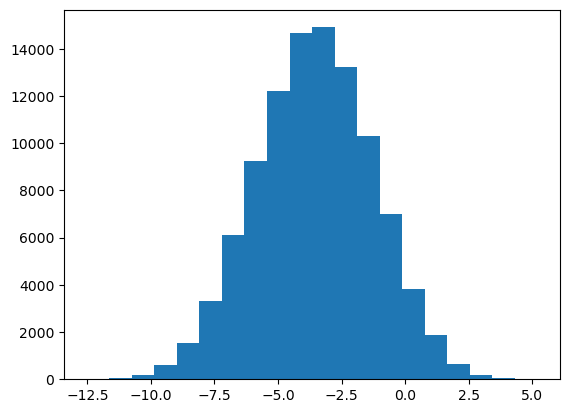

In [1]:

from scipy.stats import multivariate_normal, ortho_group
import os
import shutil
import numpy as np
import pandas as pd
from threading import Thread
import matplotlib.pyplot as plt

def kernel(z, mu, rho, beta):
    f = np.exp(-0.5 * np.sum(np.power(np.abs(z - mu), beta)/rho))
    return f

def kernel_func(x, a, feat_sub, mu, rho, beta):
    f = sum([a[i]*kernel(x[feat_sub[i]], mu[i], rho[i], beta[i]) for i in range(a.shape[0])])
    return f + np.random.normal(loc=0.0, scale=0.01)

def random_ortho_mat(dim):
    if dim == 1:
        U = np.array([[1.0]])
    else:
        U = ortho_group.rvs(dim=dim)
    return U

def generate_dataset():
    dim_feat = 10
    n_terms = 1000
    
    a = np.random.uniform(low=-1.0, high=1.0, size=(n_terms,))

    dim_sub = np.minimum(np.floor(1.5 + np.random.exponential(scale=2.0, size=(n_terms,))).astype(int), dim_feat)

    feat_sub = [np.random.choice(dim_feat, size=(dim_sub[i],), replace=False) for i in range(n_terms)]
    mu = [np.random.normal(loc=0.0, scale=1.0, size=(dim_sub[i],)) for i in range(n_terms)]

    '''
    squn_samp = np.square(np.random.uniform(low=0.1, high=0.3, size=(10000,)))
    gamma_samp = np.random.gamma(2, scale=0.02, size=(10000,))
    plt.figure()
    plt.hist(gamma_samp, bins=20)
    plt.hist(squn_samp, bins=20)
    '''

    #d = [np.diag(np.square(np.random.uniform(low=0.05, high=0.25, size=(dim_sub[i],)))) for i in range(n_terms)]
    #U = [random_ortho_mat(dim_sub[i]) for i in range(n_terms)]
    #Sigma = [U[i] @ d[i] @ U[i].T for i in range(n_terms)]

    rho = [np.random.gamma(2, scale=0.1, size=(dim_sub[i],)) for i in range(n_terms)]
    beta = np.random.uniform(low=0.0, high=2.0, size=(n_terms,))

    f = lambda x_: kernel_func(x_, a, feat_sub, mu, rho, beta)

    fig = plt.figure()
    #ax = fig.add_subplot(111, projection='3d')

    n_samples = 100000
    sample_list = []
    f_list = []

    for i in range(n_samples):
        xi = np.random.normal(loc=0.0, scale=1.0, size=(dim_feat,))
        fi = f(xi)
        f_list.append(fi)
        sample_list.append([*xi, fi])
        #ax.scatter(xi[0], xi[1], fi, color='blue', marker='.')

        if i % (n_samples//10) == 0:
            print(i, end=' ', flush=True)

    plt.hist(f_list, bins=20)
    plt.show()
    df = pd.DataFrame(sample_list)

    if os.path.exists(f'reg_data_n{dim_feat}_s{n_samples}.csv'):
        os.remove(f'reg_data_n{dim_feat}_s{n_samples}.csv')
    
    df.to_csv(f'reg_data_n{dim_feat}_s{n_samples}.csv', header=False, index=False)

if __name__ == '__main__':
    generate_dataset()